## 2 - Bayes risk with Absolute Loss

In [87]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

Etant donné l'indépendance des questions 1 et 2, nous allons étudier premièrement la deuxième question qui vise à généraliser $f^*$  avec l'`absolute loss` $l_1$

### **Question 2 (M)**

On donne
$g(z) = \int_{y\in\mathbb{R}}|y - z|p_{Y|X=x}(y)dy$ <br>

$g(z) = \int_{-\infty}^z(z-y)p_{Y|X=x}(y)dy + \int_{z}^{+\infty}(y-z)p_{Y|X=x}(y)dy$ <br>

</br>Pour trouver le minimum de $g$, on dérive par rapport à $z$ et on cherche $z$ tel que $\frac{\partial g(z)}{\partial z} = 0$.<br>

$g(z) =z\int_{-\infty}^z  P_{Y|X=x}(y)dy - \int_{-\infty}^z y P_{Y|X=x}(y)dy+\int_{z}^{+\infty} y P_{Y|X=x}(y)dy-z\int_{z}^{+\infty}  P_{Y|X=x}(y)dy$

$\frac{\partial g(z)}{\partial z}=\int_{-\infty}^z  P_{Y|X=x}(y)dy+zP_{Y|X=x}(z)-zP_{Y|X=x}(z)-zP_{Y|X=x}(z)-\int_{z}^{+\infty}  P_{Y|X=x}(y)dy+zP_{Y|X=x}(z)$

$\frac{\partial g(z)}{\partial z}=\int_{-\infty}^z P_{Y|X=x}(y)dy-\int_{z}^\infty P_{Y|X=x}(y)dy$

$\frac{\partial g(z)}{\partial z}=P(Y\le z | X=x) - P(Y\ge z | X=x)$

$\frac{\partial g(z)}{\partial z}=P(Y\le z | X=x) - (1-P(Y\le z | X=x))$

$\frac{\partial g(z)}{\partial z}=2P(Y\le z | X=x) - 1$



$\frac{\partial g(z)}{\partial z}=0 \implies 2P(Y\le z | X=x) - 1 \implies P(Y\le z | X=x)=\frac{1}{2}$<br>
On a alors $\frac{\partial g(z_0)}{\partial z}=0$  pour $z_0=Med(Y|X=x)$ <br>

$2P(Y\le z | X=x) - 1$ est une fonction strictement croissante car $P(Y\le z | X=x)$ est une fonction de répartition.<br>
Donc $\frac{\partial g(z)}{\partial z}$ est croissante on a alors:
- $\forall z\lt z_0, \frac{\partial g(z)}{\partial z} \lt 0 \implies g$ décroissante sur $]-\infty,z_0[$ <br>
    Ainsi $\forall z\lt z_0, g(z) > g(z_0)$ $(i)$
- $\forall z\gt z_0, \frac{\partial g(z)}{\partial z} \gt 0 \implies g$ croissante sur $]z_0,+\infty[$  <br>
    Ainsi $\forall z\gt z_0, g(z) > g(z_0)$ $(ii)$

D'après $(i)$ et $(ii)$ $z_0=Med(Y|X=x)$ minimise g(z) <br>


Enfin, l'estimateur de Bayes associé à l'`absolute loss` est donc $$f^*(x) = Med(Y\ |\ X=x)$$

### **Question 1 (M + C)**

On propose $X\sim \mathcal{U}_{[a,b]}$ une loi discrète
et 
$Y|X=x \sim \mathcal{E}(\lambda = x)$

Dans notre cas $a=1,b=6$

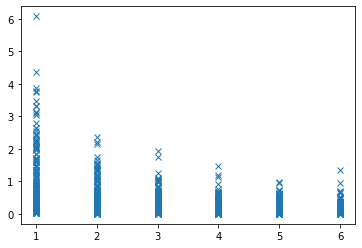

In [105]:
a = 1
b = 6
alpha = 100
n_samples = int(1e6)
epsilon = 150
X = np.random.randint(low=a, high=b + 1, size=n_samples)

y = rng.exponential(scale=1 / X)  # 1/X car pour exponential  scale = 1/lambda
n_samples_to_display = 1000
plt.plot(X[:n_samples_to_display], y[:n_samples_to_display], "x")

- D'après l'énoncé  $f^*(x)=E[Y|=x]$ lorsque la loss se calcule avec $l_{2}$
- D'après le résultat de la question 2 on a $f^*(x)=Med(Y|X=x)$ lorsque la loss se calcule avec $l_{1}$

On a  $Y|X=x \sim \mathcal{E}(\lambda = x)$

Pour $Z\sim \mathcal{E}(\lambda_{Z})$
- $Med(Z) = \frac{ln(2)}{\lambda_{Z}}$ 
- $E[Z] =  \frac{1}{\lambda_{Z}}$

Nous aurons donc les prédicteur de Bayes suivants:
| loss | $f^*(x)$ |
| :- | :- |
| $l_1$ |$\frac{ln(2)}{x}$|
| $l_2$ |$\frac{1}{x}$ |
